In [2]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

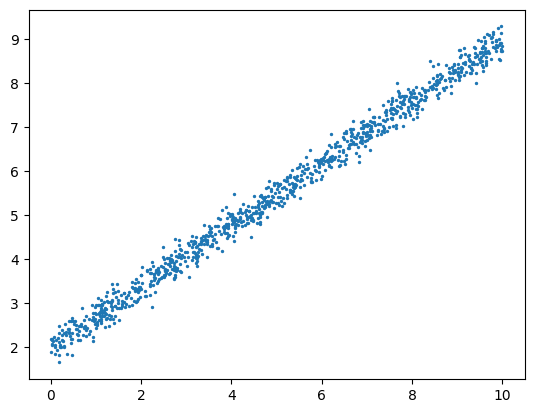

In [3]:
TOTAL_POINTS = 1000

x = tf.random.uniform(shape=[TOTAL_POINTS], minval=0, maxval=10)
noise = tf.random.normal(shape=[TOTAL_POINTS], stddev=0.2)

k_true = 0.7
b_true = 2.0

y = x * k_true + b_true + noise

plt.scatter(x, y, s=2)
plt.show()

Задача: по полученным точкам состановить функцию `f`, т.е. найти параметры `b` и `k`

### Реализация градиентного спуска

Первым делом надо задать начальные значения `b` и `k` (пусть они равны нулю):

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7023758888244629>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9810211658477783>


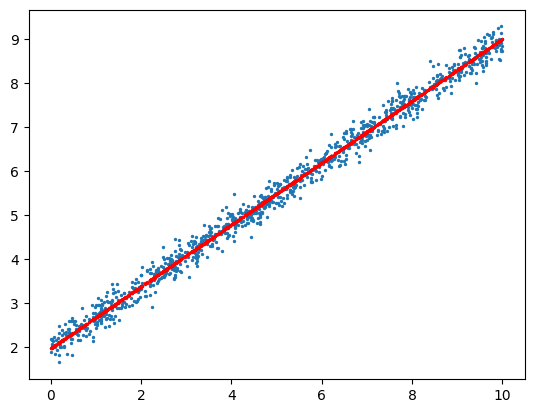

In [6]:
EPOCHS = 500
learning_rate = 0.02

k = tf.Variable(0.0)
b = tf.Variable(0.0)

for n in range(EPOCHS):
    with tf.GradientTape() as t:
        f = k * x + b
        loss = tf.reduce_mean(tf.square(y - f))
 
    dk, db = t.gradient(loss, [k, b])
 
    k.assign_sub(learning_rate * dk)
    b.assign_sub(learning_rate * db)

print(k, b, sep="\n")
 
y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)
plt.show()

### Стохастический градиентный спуск

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.6973830461502075>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9795397520065308>


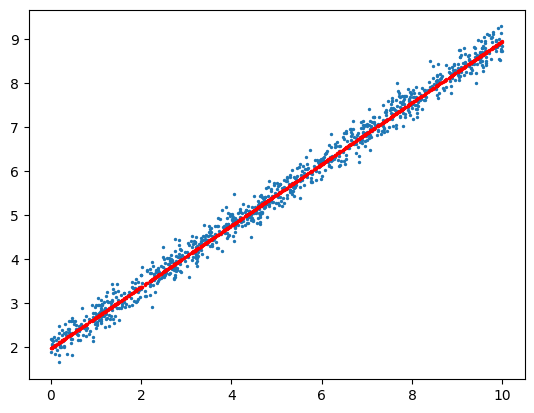

In [9]:
EPOCHS = 50
BATCH_SIZE = 100
num_steps = TOTAL_POINTS // BATCH_SIZE

k = tf.Variable(0.0)
b = tf.Variable(0.0)

opt = tf.optimizers.SGD(learning_rate=0.02)
 
for n in range(EPOCHS):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
 
        with tf.GradientTape() as t:
            f = k * x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch - f))
 
        dk, db = t.gradient(loss, [k, b])
 
        opt.apply_gradients(zip([dk, db], [k, b]))

print(k, b, sep="\n")
 
y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)
plt.show()

### Оптимизаторы градиентногоо спуска

#### Метод моментов (метод импульсов)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.6897643208503723>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.991302728652954>


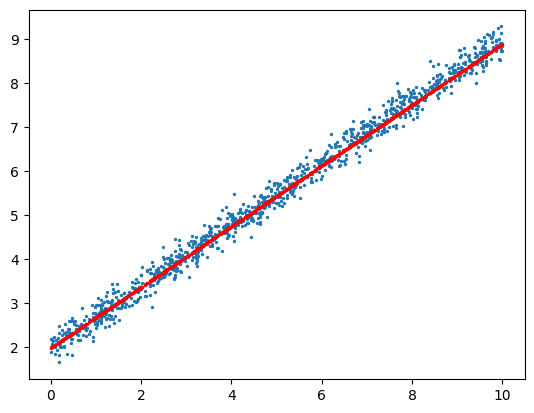

In [10]:
EPOCHS = 50
BATCH_SIZE = 100
num_steps = TOTAL_POINTS // BATCH_SIZE

k = tf.Variable(0.0)
b = tf.Variable(0.0)

opt = tf.optimizers.SGD(momentum=0.5, learning_rate=0.02)
 
for n in range(EPOCHS):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
 
        with tf.GradientTape() as t:
            f = k * x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch - f))
 
        dk, db = t.gradient(loss, [k, b])
 
        opt.apply_gradients(zip([dk, db], [k, b]))

print(k, b, sep="\n")
 
y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)
plt.show()

#### Метод Нестерова

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.6913326382637024>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.992382526397705>


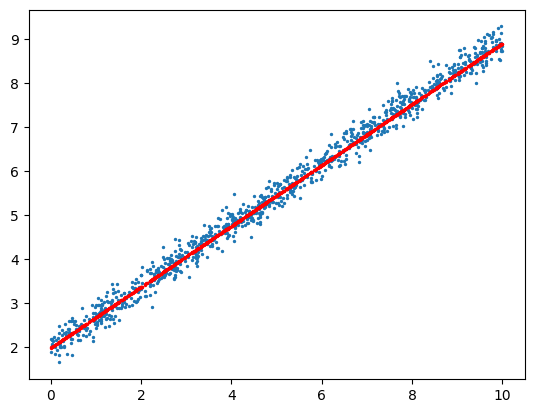

In [11]:
EPOCHS = 50
BATCH_SIZE = 100
num_steps = TOTAL_POINTS // BATCH_SIZE

k = tf.Variable(0.0)
b = tf.Variable(0.0)

opt = tf.optimizers.SGD(momentum=0.5, nesterov=True, learning_rate=0.02)
 
for n in range(EPOCHS):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
 
        with tf.GradientTape() as t:
            f = k * x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch - f))
 
        dk, db = t.gradient(loss, [k, b])
 
        opt.apply_gradients(zip([dk, db], [k, b]))

print(k, b, sep="\n")
 
y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)
plt.show()

#### Adagrad

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7232577800750732>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.8480623960494995>


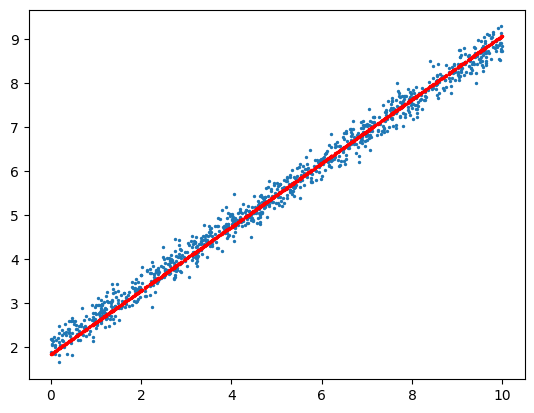

In [13]:
EPOCHS = 50
BATCH_SIZE = 100
num_steps = TOTAL_POINTS // BATCH_SIZE

k = tf.Variable(0.0)
b = tf.Variable(0.0)

opt = tf.optimizers.Adagrad(learning_rate=0.2)
 
for n in range(EPOCHS):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
 
        with tf.GradientTape() as t:
            f = k * x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch - f))
 
        dk, db = t.gradient(loss, [k, b])
 
        opt.apply_gradients(zip([dk, db], [k, b]))

print(k, b, sep="\n")
 
y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)
plt.show()

#### Adadelta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.8401246070861816>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.9292662739753723>


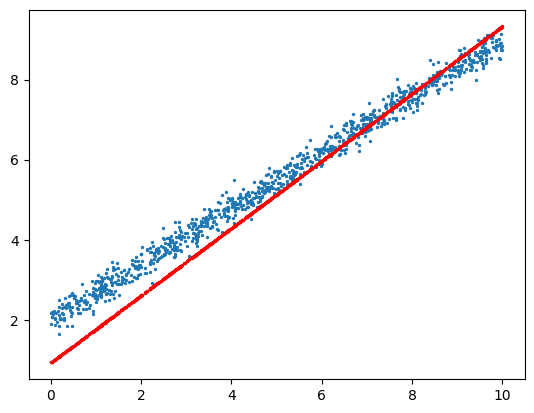

In [16]:
EPOCHS = 50
BATCH_SIZE = 100
num_steps = TOTAL_POINTS // BATCH_SIZE

k = tf.Variable(0.0)
b = tf.Variable(0.0)

opt = tf.optimizers.Adadelta(learning_rate=2.0)
 
for n in range(EPOCHS):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
 
        with tf.GradientTape() as t:
            f = k * x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch - f))
 
        dk, db = t.gradient(loss, [k, b])
 
        opt.apply_gradients(zip([dk, db], [k, b]))

print(k, b, sep="\n")
 
y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)
plt.show()

#### RMSProp

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.6952514052391052>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9884159564971924>


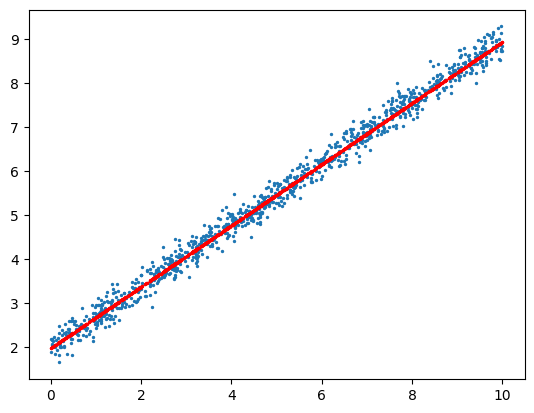

In [17]:
EPOCHS = 50
BATCH_SIZE = 100
num_steps = TOTAL_POINTS // BATCH_SIZE

k = tf.Variable(0.0)
b = tf.Variable(0.0)

opt = tf.optimizers.RMSprop(learning_rate=0.01)
 
for n in range(EPOCHS):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
 
        with tf.GradientTape() as t:
            f = k * x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch - f))
 
        dk, db = t.gradient(loss, [k, b])
 
        opt.apply_gradients(zip([dk, db], [k, b]))

print(k, b, sep="\n")
 
y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)
plt.show()

#### Adam

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.700680673122406>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9951398372650146>


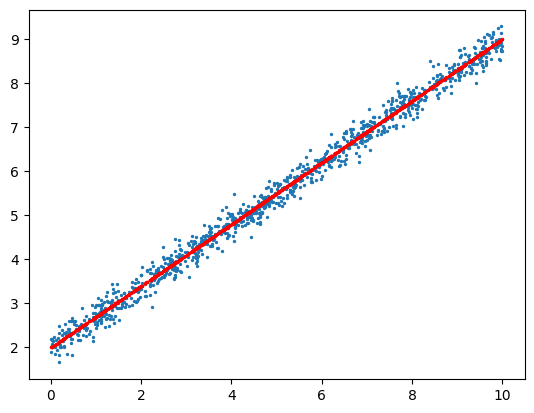

In [19]:
EPOCHS = 50
BATCH_SIZE = 100
num_steps = TOTAL_POINTS // BATCH_SIZE

k = tf.Variable(0.0)
b = tf.Variable(0.0)

opt = tf.optimizers.Adam(learning_rate=0.1)
 
for n in range(EPOCHS):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
 
        with tf.GradientTape() as t:
            f = k * x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch - f))
 
        dk, db = t.gradient(loss, [k, b])
 
        opt.apply_gradients(zip([dk, db], [k, b]))

print(k, b, sep="\n")
 
y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)
plt.show()